# This is an initial script to start playing with the data

In [1]:
import pandas as pd 
import numpy as np 

import statsmodels
import statsmodels.api as sm
import scipy.stats as stats

import matplotlib.pyplot as plt

# import the csv file with all the comments and post togheter
comDB = pd.read_csv(r"/Users/tassan-mazzoccoarthur/Desktop/NETWORK SCIENCE (MOD. B)/1_Project/database/com_liwc.csv", sep='\t', engine='python')

# import the csv file with JUST the politicians post
postDB = pd.read_csv(r"/Users/tassan-mazzoccoarthur/Desktop/NETWORK SCIENCE (MOD. B)/1_Project/database/postDB.csv", engine='python')


print (comDB)


       Origin_file_order     Site                           p_id  \
0                  30126       FB  96844400700_10157493758850701   
1                  30226       FB  96844400700_10157493758850701   
2                  60063       FB  96844400700_10157493758850701   
3                  60852       FB  96844400700_10157493758850701   
4                  61557       FB  96844400700_10157493758850701   
...                  ...      ...                            ...   
78170              70705  Twitter          1.11852926516164E+018   
78171              43288  Twitter          1.11846561220288E+018   
78172              70478  Twitter          1.11825025930045E+018   
78173              69430  Twitter          1.11824474991438E+018   
78174              45602  Twitter          1.11780731706662E+018   

                dateCreated      p_politician p_gender p_GRUPPO_PE  \
0      2019-04-23T10:33:37Z  MARCELLO GEMMATO        M         PPE   
1      2019-04-23T10:33:37Z  MARCELLO GEMMA

In [2]:
# general info ON COMMENT db
print('## Each row in the db is a comment, the information about the post that generate that comment are in the columns')
print('Number of colums in comDB : ', len(comDB.columns))
print('Number of rows in comDB : ', len(comDB.index))
print('')

# general info ON POST ONLY db
print('## Each row is a posts/tweets made by the politicians, this DB do not contain comments')
print('Number of colums in postDB : ', len(postDB.columns))
print('Number of rows in postDB : ', len(postDB.index))

## Each row in the db is a comment, the information about the post that generate that comment are in the columns
Number of colums in comDB :  243
Number of rows in comDB :  78175

## Each row is a posts/tweets made by the politicians, this DB do not contain comments
Number of colums in postDB :  246
Number of rows in postDB :  10103


In [4]:
# create the Data Frame
df = pd.DataFrame(data=comDB)
df_post = pd.DataFrame(data=postDB)

df

# add a new colum with sequence numbers
df['Count']=1
df_post['Count']=1

# print all the DF
pd.set_option('display.max_columns', None)
pd.set_option('display.max_row', 5)

df

#df_post

,Origin_file_order,Site,p_id,dateCreated,p_politician,p_gender,p_GRUPPO_PE,p_LISTA,p_PARTITO,p_governo,p_dx_sx,p_CIRCOSCRIZIONE,p_text,p_favoriteCount,p_shareCount,p_replyCount,p_replyEval,p_numComments,p_numFakeTags,p_rating,p_category,p_topic,p_campagna,p_camapagna2,Target1,Target2,p_targe1-2,target1_s-p,target1_pol,c_text,c_level,c_replyToUser,c_replyToText,c_rating,c_rating3,c_ratingCivile,c_ratingPosNeg,c_category,Unnamed: 38,c_topic,isPersonal,c_WC,c_WPS,c_Sixltr,c_Dic,c_pronomi,c_Io,c_Noi,c_Se,c_Tu,c_Altri,c_Negazio,c_Consen,c_Articol,c_Prepos,c_Numero,c_Affett,c_Sen_Pos,c_Emo_Pos,c_Ottimis,c_Emo_Neg,c_Ansia,c_Rabbia,c_Tristez,c_Mec_Cog,c_Causa,c_Intros,c_Discrep,c_Inibiz,c_possib,c_Certez,c_Proc_Sen,c_Vista,c_Udito,c_Sentim,c_Social,c_Comm,c_Rif_gen,c_amici,c_Famigl,c_Umano,c_Tempo,c_Passato,c_Present,c_Futuro,c_Spazio,c_Sopra,c_Sotto,c_Inclusi,c_Esclusi,c_Movimen,c_Occupaz,c_Scuola,c_Lavoro,c_Raggiun,c_Svago,c_Casa,c_Sport,c_TV_it,c_Musica,c_Soldi,c_Metafis,c_religio,c_Morte,c_Fisico,c_Corpo,c_Sesso,c_Mangiare,c_Dormire,c_Cura_cor,c_parolac,c_Non_flu,c_riempiti,c_Voi,c_Lui_lei,c_Loro,c_Condizio,c_Transiti,c_P_pass,c_gerundio,c_Passivo,c_Essere,c_Avere,c_Formale,c_Io_Ver,c_Tu_Verbo,c_Lui_Verb,c_Noi_Verb,c_Voi_Verb,c_Loro_Ver,c_AllPunc,c_Period,c_Comma,c_Colon,c_SemiC,c_Qmark,c_Exclam,c_Dash,c_Quote,c_Apostro,c_Parenth,c_OtherP,p_WC,p_WPS,p_Sixltr,p_Dic,p_pronomi,p_Io,p_Noi,p_Se,p_Tu,p_Altri,p_Negazio,p_Consen,p_Articol,p_Prepos,p_Numero,p_Affett,p_Sen_Pos,p_Emo_Pos,p_Ottimis,p_Emo_Neg,p_Ansia,p_Rabbia,p_Tristez,p_Mec_Cog,p_Causa,Ip_ntros,p_Discrep,Ip_nibiz,p_possib,p_Certez,p_Proc_Sen,p_Vista,p_Udito,p_Sentim,p_Social,p_Comm,p_Rif_gen,p_amici,p_Famigl,p_Umano,p_Tempo,p_Passato,p_Present,p_Futuro,p_Spazio,p_Sopra,p_Sotto,Ip_nclusi,p_Esclusi,p_Movimen,p_Occupaz,p_Scuola,p_Lavoro,p_Raggiun,p_Svago,p_Casa,p_Sport,p_TV_it,p_Musica,p_Soldi,p_Metafis,p_religio,p_Morte,p_Fisico,p_Corpo,p_Sesso,p_Mangiare,p_Dormire,p_Cura_cor,p_parolac,p_Non_flu,p_riempiti,p_Voi,p_Lui_lei,p_Loro,p_Condizio,p_Transiti,p_P_pass,p_gerundio,p_Passivo,p_Essere,p_Avere,p_Formale,p_Io_Ver,p_Tu_Verbo,p_Lui_Verb,p_Noi_Verb,p_Voi_Verb,p_Loro_Ver,p_AllPunc,p_Period,p_Comma,p_Colon,p_SemiC,p_Qmark,p_Exclam,p_Dash,p_Quote,p_Apostro,p_Parenth,p_OtherP,Count
0,30126,FB,96844400700_10157493758850701,2019-04-23T10:33:37Z,MARCELLO GEMMATO,M,PPE,FDI,FDI,opposizione,destra,s,Se i musulmani pensano di portare la guerra sa...,270,80,57,33,1729,0,problematico,Rifugiati Musulmani,religioni europa,Comparativa,Neg-comp,Categoria di persone,NaN,Categoria di persone,gruppo,non politico,C'è poco da dire questa è gente che la guerra ...,1,FRATELLIDITALIA.PUGLIA,Se i musulmani pensano di portare la guerra sa...,problematico,probl-hate,incivile,negativo,Rifugiati Musulmani,NaN,Other,Other,4,2.0,50.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0,0.0,0.0,0.00,0.00,0.0,0.0,125.00,100.00,0.0,0.0,0.0,0.00,25.00,0.0,0.0,0.0,0.0,0.00,6,6.0,33.33,33.33,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.00,33.33,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.00,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.00,0.00,0,0.00,0.0,0.0,0.0,0.0,0.0,16.67,16.67,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1
1,30226,FB,96844400700_10157493758850701,2019-04-23T10:33:37Z,MARCELLO GEMMATO,M,PPE,FDI,FDI,opposizione,destra,s,Se i musulmani pensano di portare la guerra sa...,270,80,57,33,1729,0,problematico,Rifugiati Musulmani,religioni europa,Comparativa,Neg-comp,Categoria di persone,NaN,Categoria di persone,gruppo,non politico,Marcello fai qualcosa perfavore,

# Those 2 graphs are examples of explorative analysis you can run
- It's important to notice the Pandas code (df_post.loc[df_post['Site'] == 'FB']) used to extract a subset of the whole data frame. We will need to do this procedure many times, try to think about other possible subsets.
- The "campaign type" variable used in this graph is an example of this database's manually coded variables. This variable required 10 persons for 1 week to be appropriately coded (each content - 10k post/tweet - has been coded twice).


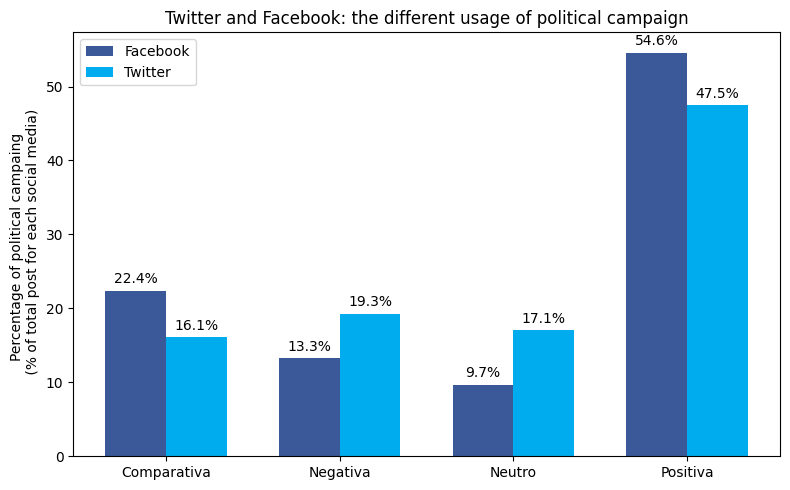

This graph represents the different use of the 4 campaign types (comparative, negative, neutral and positive).
We can see that politicians use more comparative and positive campaigns on Facebook 
 and more negative campaign on Twitter. 
It probably depends on the smaller amount of words you can post on Twitter.


In [5]:
# take the right part of the df
# this create 2 variables (y and z) that we will compare in the graph

z = df_post.loc[df_post['Site'] == 'FB']
z = z.groupby(['p_campagna']).count()
z = z.Count.transform(lambda x: x/x.sum()*100).round(1)  # make the percentage

y = df_post.loc[df_post['Site'] == 'Twitter']
y = y.groupby(['p_campagna']).count()
y = y.Count.transform(lambda x: x/x.sum()*100).round(1)  # make the percentage



# collect the labels and place them under the two variables
labels = z.index   # the text of the lables
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# graph creation and axis creation  
fig, ax = plt.subplots(figsize=(8,5), dpi=100)

rects1 = ax.bar(x - width/2, z, width, label='Facebook', color='#3b5998', error_kw=dict(elinewidth=6, ecolor='yellow'))
rects2 = ax.bar(x + width/2, y, width, label='Twitter', color='#00aced', error_kw=dict(elinewidth=6, ecolor='yellow'))

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Percentage of political campaing \n (% of total post for each social media)')
ax.set_title('Twitter and Facebook: the different usage of political campaign')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# bar labels function
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
autolabel(rects1)
autolabel(rects2)

# plot the graph
fig.tight_layout()
plt.savefig('Campaign_per_social_media.png', dpi=300)
plt.show()

# short explanation of the graph
print('This graph represents the different use of the 4 campaign types (comparative, negative, neutral and positive).\nWe can see that politicians use more comparative and positive campaigns on Facebook \n and more negative campaign on Twitter. \nIt probably depends on the smaller amount of words you can post on Twitter.')

# Some additional reflections
- This is one of my master thesis's preliminary results: the hate speech comments are significantly more when answering negative and comparative political communication posts/tweets. 
- Because of the temporal line (before the politician makes the post, after the citizen answer to it), we can hypothesize causality between the political communication and the hate comments.
- Be aware that positive posts are much more than comparative and negative. That's mean the effect is more significant than what it seems from this graph; you can try to plot the absolute numbers of each type of political campaign to get an idea.

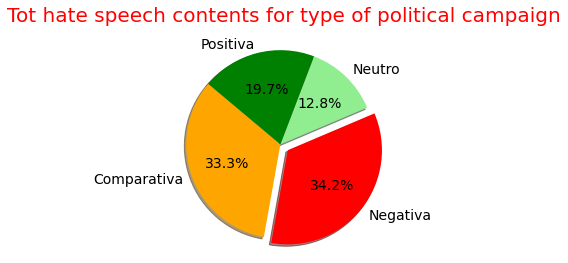

In [6]:
# Take the right subset, in this case the hate speech comments 
# in relation the type of campaign they answer to
y = comDB.loc[comDB['c_rating'] == 'hate']
y = y.groupby(['p_campagna']).count()
y = y.Count.transform(lambda x: x/x.sum()*100).round(1)


# create the lables and set the graph
labels = y.index
plt.rcParams['font.size'] = 14 
sizes = y
colors = ['orange', 'red', 'lightgreen', 'green']
explode = (0.0, 0.1, 0.0, 0)  # explode 1st slice


# Plot the graph
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)


# plot some titles
plt.axis('equal')
plt.title('Tot hate speech contents for type of political campaign', 
          fontsize='20', 
          loc='center',
          #backgroundcolor='red', 
          color='red',
          y=1.05)


#save the result
plt.savefig('hate_speech_per_campaign.png', dpi=950)

plt.show()

# I play with data

In [7]:
'''poli = comDB.loc[comDB['c_rating'] == 'hate']
print(poli)
poli = poli.groupby(['p_campagna']).count()
#poli
poli = poli.Count.transform(lambda x: x/x.sum()*100).round(1)
#poli'''

#number of politicians
num_pol=df['p_politician'].unique()
print(len(num_pol))

77


In [11]:
#number of comments by party

by_pol_party=df.groupby("p_PARTITO").sum()[["Count"]]
by_pol_party = df.groupby("p_PARTITO").sum().iloc[:, -1:] #same result
pd.set_option('display.max_row', 10)
by_pol_party

,Count
p_PARTITO,
+ Europa,5296
FDI,10245
FI,7224
La Sinistra,3236
Lega,18760
M5S,9544
PD,20519
Possibile,1659


In [9]:
#average negative emtions on posts 
p_neg_emotion=df_post["c_Emo_Neg"]
#p_neg_emotion=p_neg_emotion[p_neg_emotion>0].mean() #with only values  0
p_neg_emotion


0         0.00
1         4.08
2         4.26
3        16.67
4         0.00
         ...  
10098     0.00
10099     0.00
10100     2.86
10101     7.69
10102     0.00
Name: c_Emo_Neg, Length: 10103, dtype: float64